In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.signal import savgol_filter

%config InlineBackend.figure_format='retina'

In [2]:
df_x = pd.read_excel('data/velocity data_Euan workshop_RW/X velocity_raw data.xlsx')
df_y = pd.read_excel('data/velocity data_Euan workshop_RW/Y velocity_raw data.xlsx')
df_z = pd.read_excel('data/velocity data_Euan workshop_RW/Z velocity_raw data.xlsx')

time = pd.read_excel('data/velocity data_Euan workshop_RW/velocity_timestamp.xlsx', names = ['time'])
height = pd.read_excel('data/velocity data_Euan workshop_RW/velocity_ range (bin height).xlsx').T.reset_index()
height.columns = ['height']

In [3]:
def process(df):
    
    df.columns = height.height.round(3)
    df.index = time.time.round(3)

    df = df.T[::-1]
    df = df.apply(pd.to_numeric)
    
    return df
    
df_x = process(df_x)
df_y = process(df_y)
df_z = process(df_z)

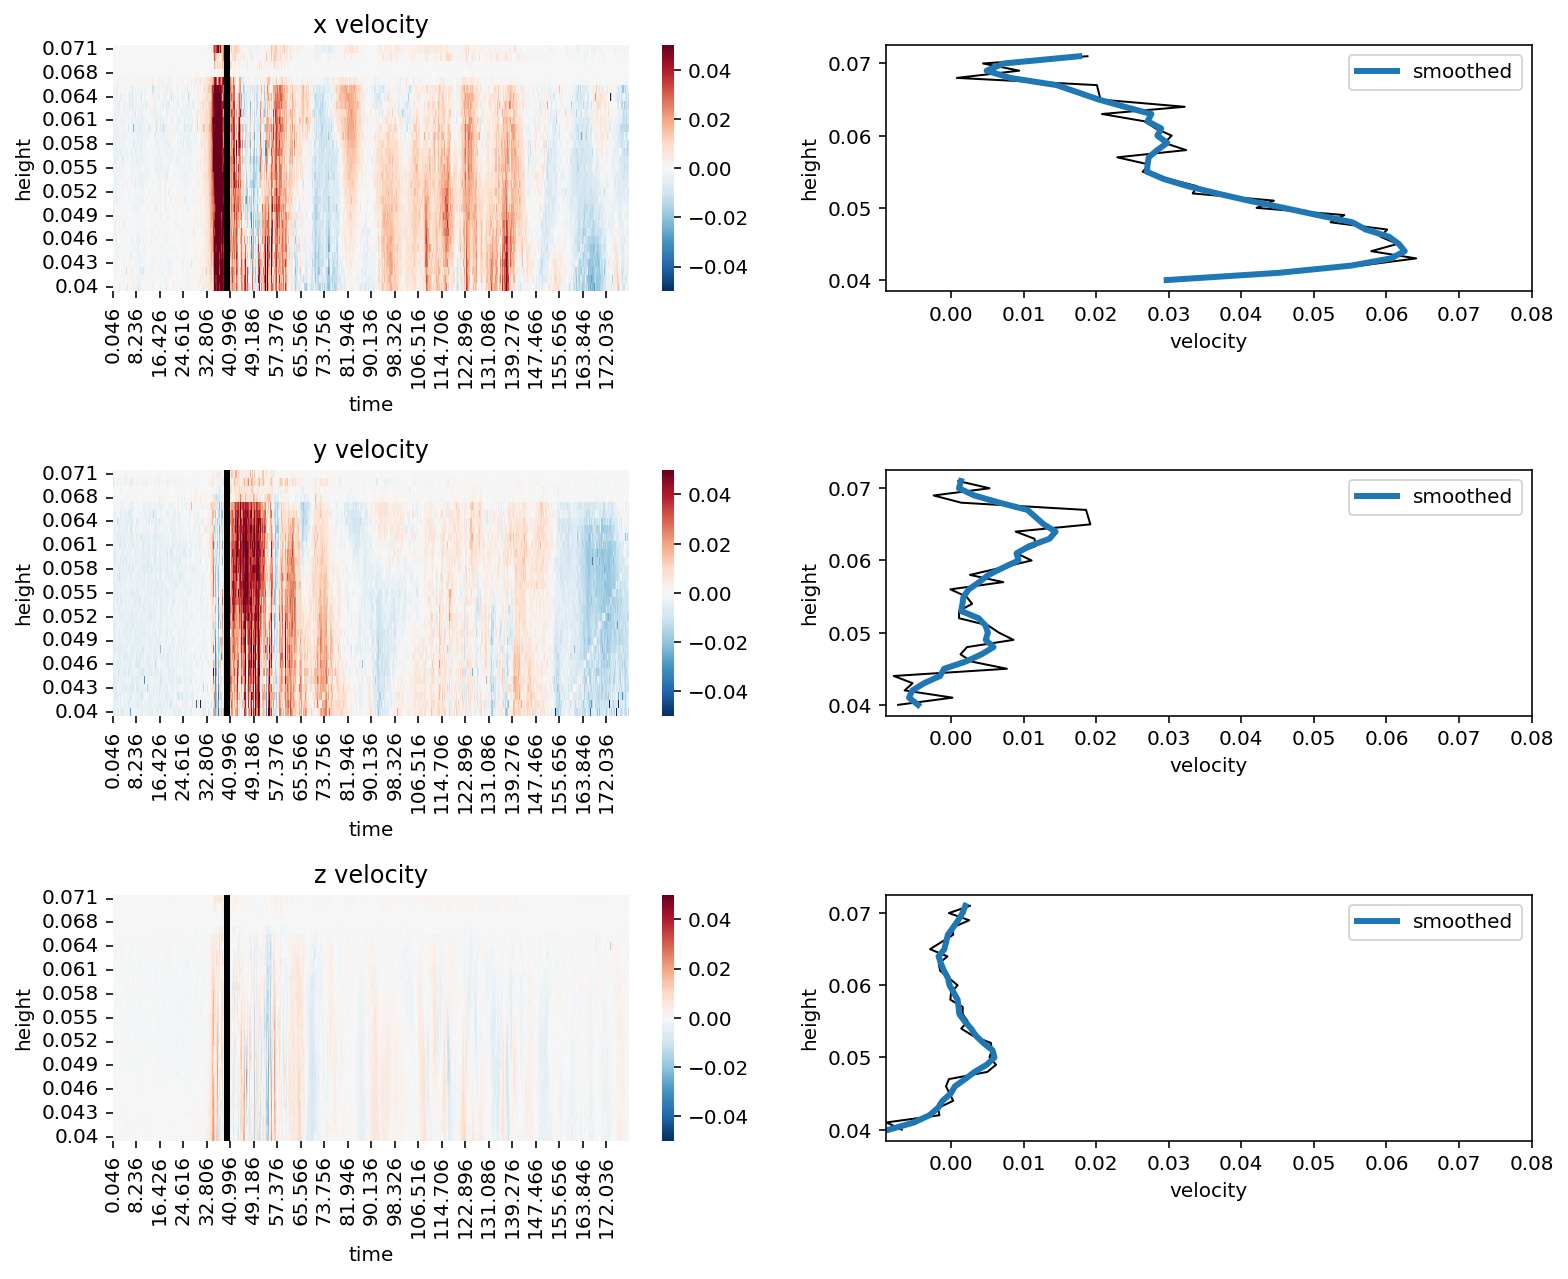

In [4]:
fig, ax = plt.subplots(figsize = (11, 9), nrows = 3, ncols = 2) 

sns.heatmap(df_x, vmin = -0.05, vmax = 0.05, cmap = 'RdBu_r', ax = ax[0, 0])
sns.heatmap(df_y, vmin = -0.05, vmax = 0.05, cmap = 'RdBu_r', ax = ax[1, 0])
sns.heatmap(df_z, vmin = -0.05, vmax = 0.05, cmap = 'RdBu_r', ax = ax[2, 0])

ax[0, 0].set(title = 'x velocity')
ax[1, 0].set(title = 'y velocity')
ax[2, 0].set(title = 'z velocity')

ax[0, 0].vlines(4000, 0, 100, lw = 3, color = 'black')
ax[1, 0].vlines(4000, 0, 100, lw = 3, color = 'black')
ax[2, 0].vlines(4000, 0, 100, lw = 3, color = 'black')

##############

ax[0, 1].plot(df_x.iloc[:, 4000], df_x.index, color = 'black', lw = 1)
ax[1, 1].plot(df_y.iloc[:, 4000], df_y.index, color = 'black', lw = 1)
ax[2, 1].plot(df_z.iloc[:, 4000], df_z.index, color = 'black', lw = 1)

smoothed_x = savgol_filter(df_x.iloc[:, 4000], 9, 3)
smoothed_y = savgol_filter(df_y.iloc[:, 4000], 9, 3)
smoothed_z = savgol_filter(df_z.iloc[:, 4000], 9, 3)

ax[0, 1].plot(smoothed_x, df_x.index, color = 'tab:blue', label = 'smoothed', lw = 3)
ax[1, 1].plot(smoothed_y, df_y.index, color = 'tab:blue', label = 'smoothed', lw = 3)
ax[2, 1].plot(smoothed_z, df_z.index, color = 'tab:blue', label = 'smoothed', lw = 3)

ax[0, 1].legend(loc = 'upper right')
ax[1, 1].legend(loc = 'upper right')
ax[2, 1].legend(loc = 'upper right')

ax[0, 1].set(xlabel = 'velocity', ylabel = 'height', xlim = [-0.009, 0.08])
ax[1, 1].set(xlabel = 'velocity', ylabel = 'height', xlim = [-0.009, 0.08])
ax[2, 1].set(xlabel = 'velocity', ylabel = 'height', xlim = [-0.009, 0.08])

plt.tight_layout()